#### Causality & Simulation Lecture Examples

In [16]:
#Random Choice
import numpy as np

two_groups = np.array(['treatment', 'control'])
np.random.choice(two_groups)

'control'

In [17]:
#Random Choice 10 times
np.random.choice(two_groups, 10)

array(['control', 'control', 'control', 'treatment', 'treatment',
       'control', 'control', 'control', 'treatment', 'control'],
      dtype='<U9')

**Rolling Dice**

In [25]:
def bet_on_one_roll():
    """Returns my net gain on one bet"""
    x = np.random.choice(np.arange(1, 7))  # roll a die once and record the number of spots
    if x <= 2:
        return -1
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1

    
bet_on_one_roll()

1

**Lets play 5 times**

In [26]:
for i in np.arange(5):
    print(bet_on_one_roll())

1
-1
-1
-1
0


**We can now simulate five bets on the dice and collect the results in an array that we will call the collection array.**

In [29]:
outcomes = np.array([])

for i in np.arange(5):
    outcome_of_bet = bet_on_one_roll()
    outcomes = np.append(outcomes, outcome_of_bet)
    
outcomes

array([ 0.,  0.,  0.,  1., -1.])

**Let us rewrite the cell with the for statement unrolled:**

In [30]:
outcomes = np.array([])

i = np.arange(5).item(0)
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

i = np.arange(5).item(1)
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

i = np.arange(5).item(2)
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

i = np.arange(5).item(3)
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

i = np.arange(5).item(4)
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

outcomes

array([1., 0., 1., 1., 0.])

**We can see the variation in the results of 300 bets by running exactly the same code for 300 bets instead of five.**

In [32]:
outcomes = np.array([])

for i in np.arange(300):
    outcome_of_bet = bet_on_one_roll()
    outcomes = np.append(outcomes, outcome_of_bet)
    
len(outcomes)

300

Text(0, 0.5, 'Count')

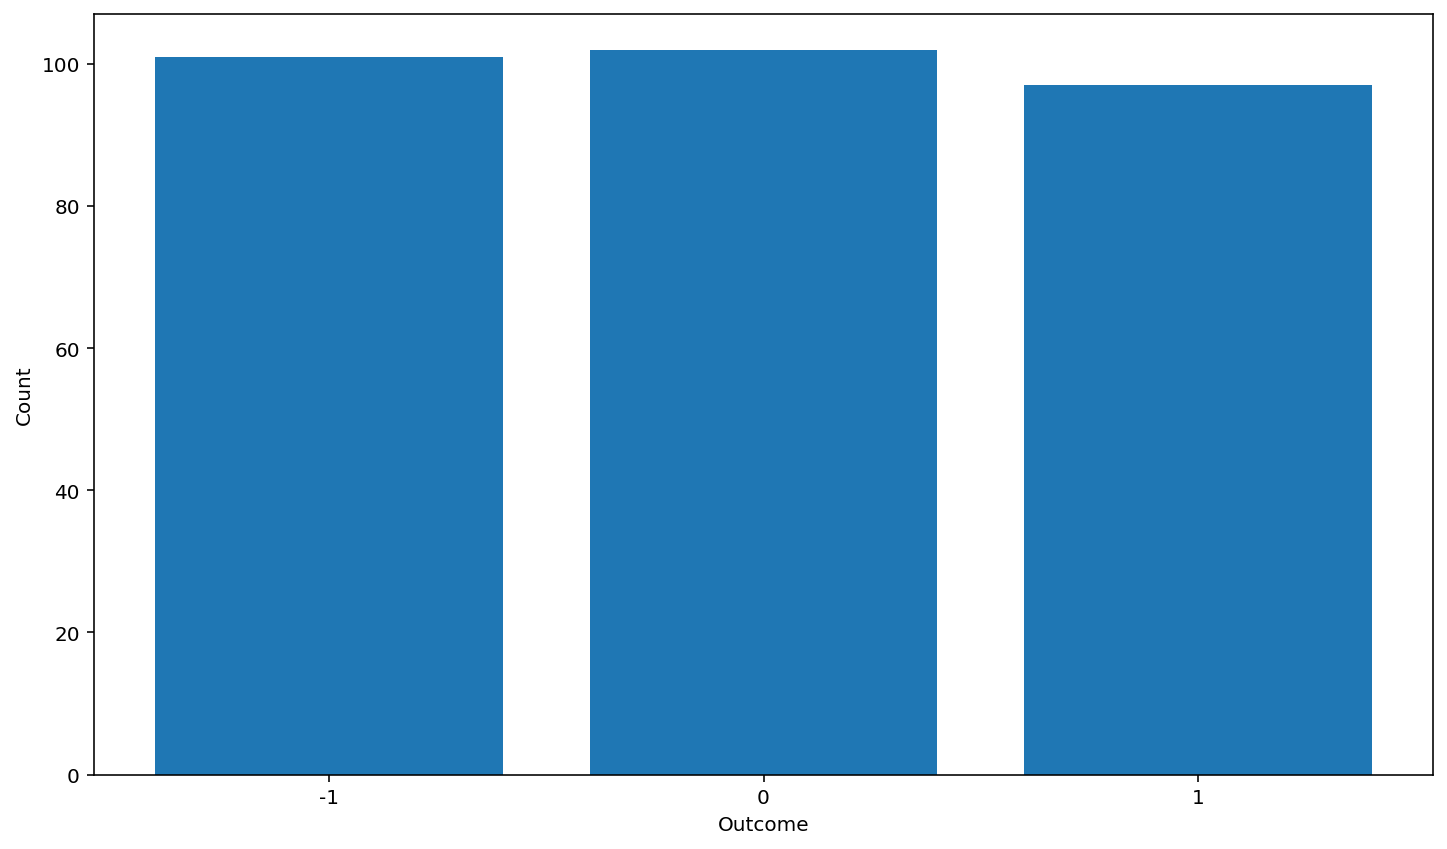

In [51]:
import matplotlib.pyplot as plt

outcomes_loss=np.count_nonzero(outcomes == -1)
outcomes_draw=np.count_nonzero(outcomes == 0)
outcomes_win=np.count_nonzero(outcomes == 1)

my_simulated_data = {"-1": outcomes_loss, "0": outcomes_draw, "1": outcomes_win}
keys = my_simulated_data.keys()
values = my_simulated_data.values()

plt.bar(keys, values)
plt.xlabel('Outcome')
plt.ylabel('Count')

**Monty Hall Simulation**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

goats = np.array(['first goat', 'second goat'])

def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

#Lets check if the function works
other_goat('first goat'), other_goat('second goat'), other_goat('watermelon')


('second goat', 'first goat', None)

In [3]:
#The array hidden_behind_doors contains the set of things that could be behind the doors.

hidden_behind_doors = np.array(['car', 'first goat', 'second goat'])

#function for the game (placing the prizes behind curtains)
def monty_hall_game():
    """Return [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_guess = np.random.choice(hidden_behind_doors)
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]
    
monty_hall_game()

['car', 'second goat', 'first goat']

In [4]:
# Create a dataframe for simulation results

games = pd.DataFrame(columns = ['Guess', 'Revealed', 'Remaining'])

# Play the game 10000 times and 
# record the results in the table games

for i in np.arange(10000):
    result=monty_hall_game()
    games=games.append({'Guess': result[0], 'Revealed': result[1], 'Remaining': result[2]}, ignore_index=True)

#The simulation is done. Notice how short the code is. The majority of the work was done in simulating the outcome of one game.
games.head()

,Guess,Revealed,Remaining
0,first goat,second goat,car
1,first goat,second goat,car
2,second goat,first goat,car
3,first goat,second goat,car
4,car,first goat,second goat


In [6]:
#To see whether the contestant should stick with her original choice or switch, let's see how frequently the car is behind each of her two options.
original_choice =games['Guess'].value_counts()
original_choice


second goat    3375
first goat     3320
car            3305
Name: Guess, dtype: int64

In [8]:
remaining_door =games['Remaining'].value_counts()
remaining_door


TypeError: 'Series' object is not callable

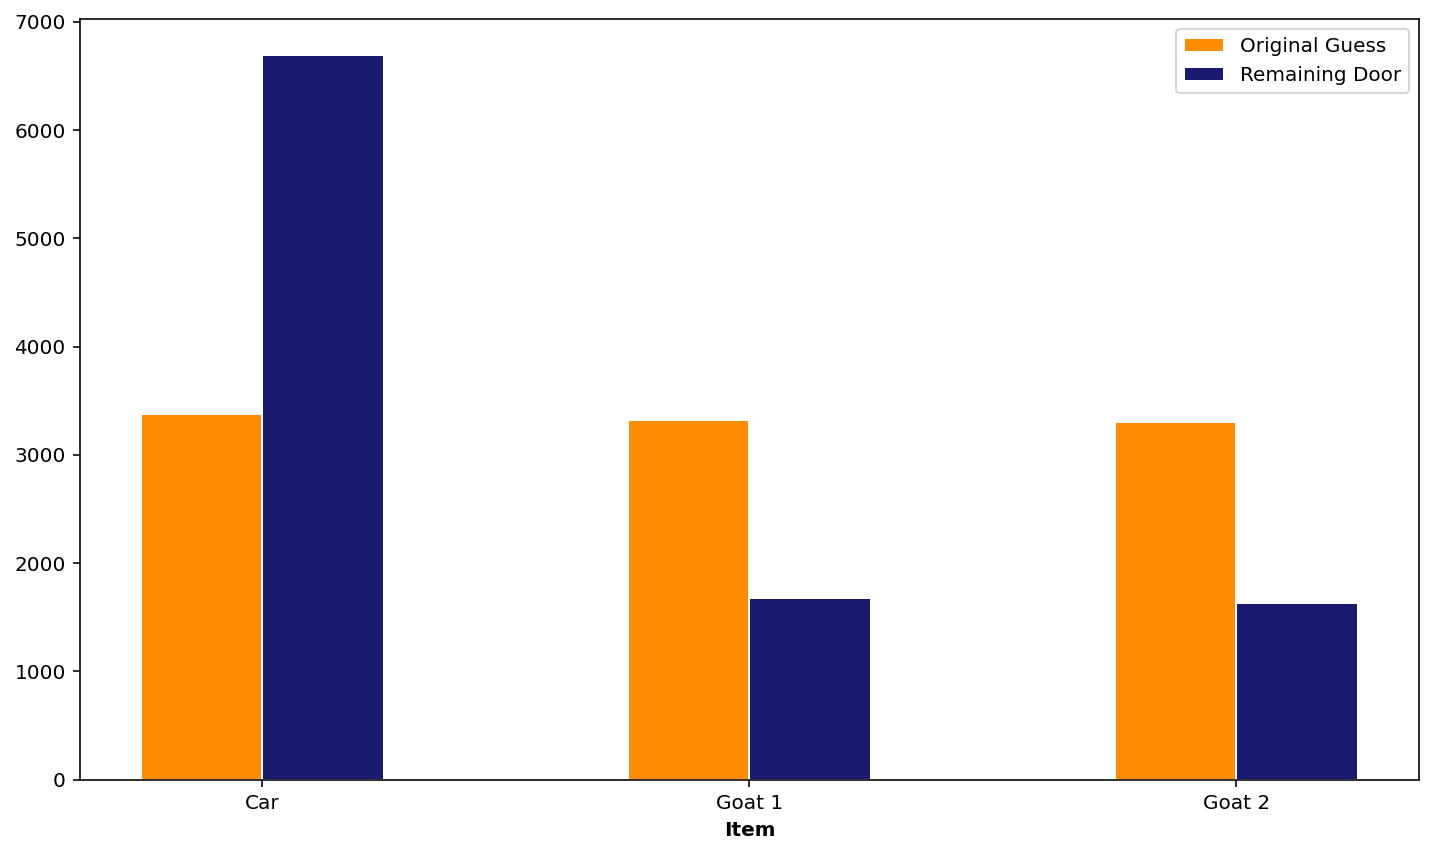

In [11]:
# Let's plot a grouped barplot

# set width of bar
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(original_choice))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, original_choice, color='darkorange', width=barWidth, edgecolor='white', label='Original Guess')
plt.bar(r2, remaining_door, color='midnightblue', width=barWidth, edgecolor='white', label='Remaining Door')
 
# Add xticks on the middle of the group bars
plt.xlabel('Item', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(original_choice))], ['Car', 'Goat 1', 'Goat 2'])
 
# Create legend & Show graphic
plt.legend()
plt.show()